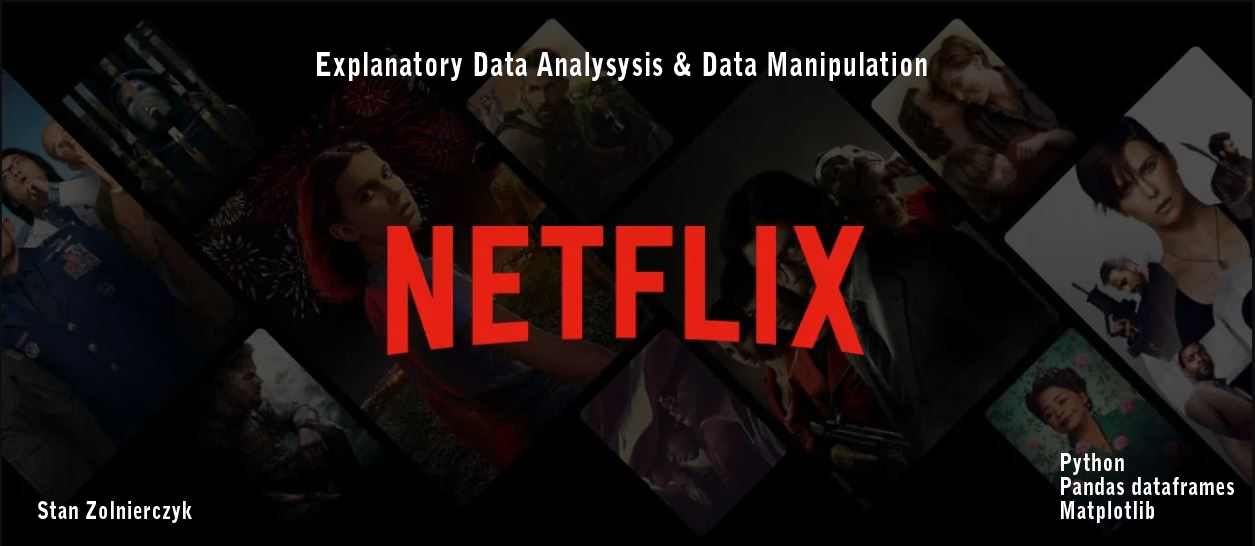

Netflix started in 1997 as a DVD rental service and has since exploded into one of the largest entertainment and media companies.
Given the large number of movies and series available on the platform, it is a perfect opportunity to run some exploratory data analysis and draw some interesting conclusions about the entertainment industry.
This presentation utilizes **python** with its **matplotlib** and **pandas** libraries

**Note**: the data available for this presentation was collected in early 2021. It is given as a simple .csv file.


In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

So how to start an exploratory data analysis, assuming you don't know anything about the data? Firstly, I'd like to know more about what kind od data I have.

In [3]:
# Check the shape of the dataframe. The result is (number fo rows, number of columns)
netflix_df.shape

(4812, 11)

In [4]:
# Print the first 10 rows of the dataframe to see names of the headers and what kind of data is stored in each column
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
7,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
8,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies
9,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,103,A farmer pens a confession admitting to his wi...,Dramas


In [5]:
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [7]:
netflix_df.index

RangeIndex(start=0, stop=4812, step=1)

Check if there are any missing values in the dataframe

In [25]:
print(netflix_df.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


After this preliminary check it is knonwn that the database has 4812 rows (so 4812 shows) and each row  has 11 colums of data:

| Column | Description |
|--------|-------------|
| `show_id` | Unique ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

Let me start with some simple Simple quantitative analyses.

In [9]:
# Check how many shows are there in the database by type of show
types_sum = netflix_df.groupby('type').count()
print(types_sum['show_id'])

type
Movie      4677
TV Show     135
Name: show_id, dtype: int64


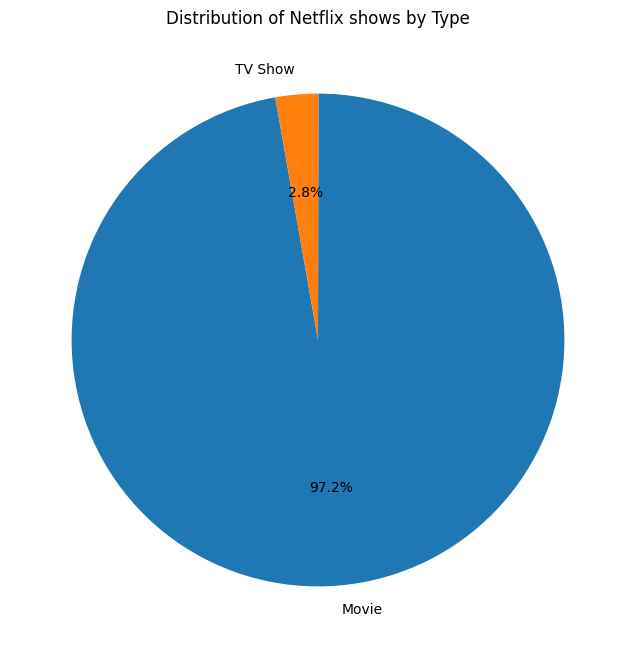

In [10]:
# Create a pie chart out of these data
type_counts = types_sum['show_id']
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=100)

plt.title('Distribution of Netflix shows by Type')
plt.show()

In [11]:
# Check how many shows are there in the database by genre
genres_sum = netflix_df.groupby('genre').size().reset_index(name='count')
# Sort the results with most frequent on top
genres_sum_sorted = genres_sum.sort_values(by='count', ascending=False)

print(genres_sum_sorted.to_string(index=False))
# Count the number of genres
number_of_genres = len(genres_sum)
print('Total number of genres: ' + str(number_of_genres))

               genre  count
              Dramas   1343
            Comedies   1029
              Action    696
            Children    421
       Documentaries    352
            Stand-Up    283
       Horror Movies    239
International Movies    100
      Classic Movies     69
           Thrillers     49
    International TV     39
            Crime TV     30
       Uncategorized     25
          British TV     20
  Independent Movies     20
      Anime Features     18
               Music     14
         Cult Movies     11
              Sci-Fi     11
                Kids     10
        Anime Series      9
          Docuseries      7
            TV Shows      4
     Romantic Movies      3
         TV Comedies      3
           TV Action      2
        LGBTQ Movies      1
          Reality TV      1
             Classic      1
           TV Horror      1
         Romantic TV      1
Total number of genres: 31


In [12]:
#check how many shows are there in the database by country of origin. Display in alphabetical order
coutries_sum = netflix_df.groupby('country').count()
print(coutries_sum['show_id'])

country
Argentina          46
Australia          50
Austria             5
Bangladesh          2
Belgium             6
                 ... 
United States    1886
Uruguay             7
Venezuela           1
Vietnam             5
Zimbabwe            1
Name: show_id, Length: 72, dtype: int64


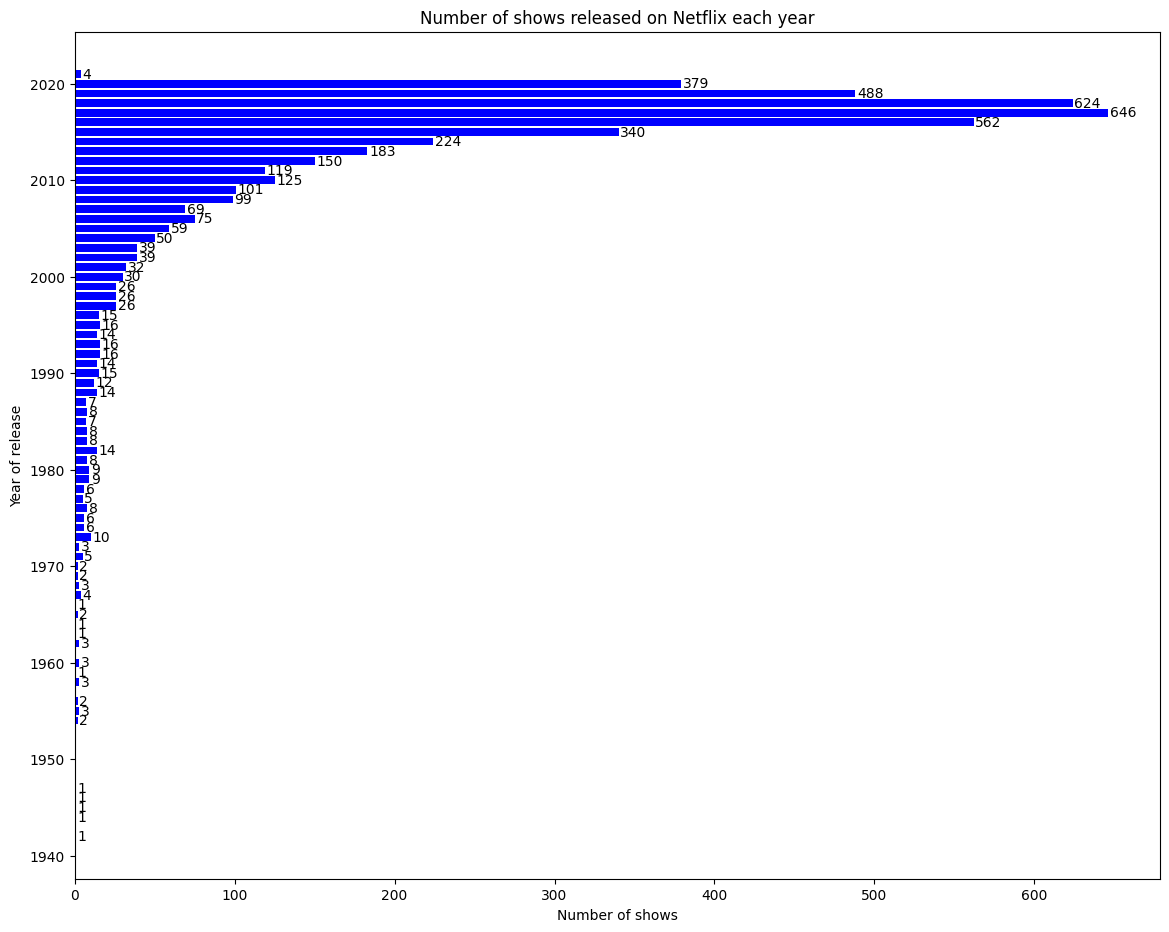

In [13]:
#check how many shows are there in the database by year of release
years_sum = netflix_df.groupby('release_year').count()

# Build a bar plot for the data.
plt.figure(figsize=(14, 11))
graph = plt.barh(years_sum.index, years_sum['show_id'], color='blue')

# Add value-as-text next to each bar
for bar in graph:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, int(xval), ha='left', va='center')

# Strings
xlab = 'Number of shows'
ylab = 'Year of release'
title = 'Number of shows released on Netflix each year'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)

# display the plot after customizing
plt.show()

# So now I can say that I know my data quite well. It is time to aks some more interesting questions and get the answers by analyzing the data.

First example. What was the mean duration of all movies released between 1990 and 1999?

In [14]:
# Extract Movies only (drop TV shows)
movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Further subset the data: select movies from the nineties
movies_1990s = movies_only[(movies_only['release_year'] >= 1990) & (movies_only['release_year'] <= 1999)]

# calculate the mean duration of the above subset
duration1 = round(movies_1990s['duration'].mean())
print('The mean duration of all movies released between 1990 and 1999 is ' + str(duration1) + ' min')


The mean duration of all movies released between 1990 and 1999 is 115 min


Let's put it in a slightly different way. What was the most frequent movie duration in the 1990s?

In [15]:
#Group movies form 1990s by duration and count occurrences
movies_1990s_duration = movies_1990s.groupby('duration').count()

# Get the index name (so the duration) of the row with the most counts. (all the colums are the same, so take one of them)
# Convert the result to regular integer
duration = int(movies_1990s_duration['show_id'].idxmax())
print('The most frequent movie duration released between 1990 and 1999 is ' + str(duration) + ' min')

The most frequent movie duration released between 1990 and 1999 is 94 min


Let me build a graphic representation for this.

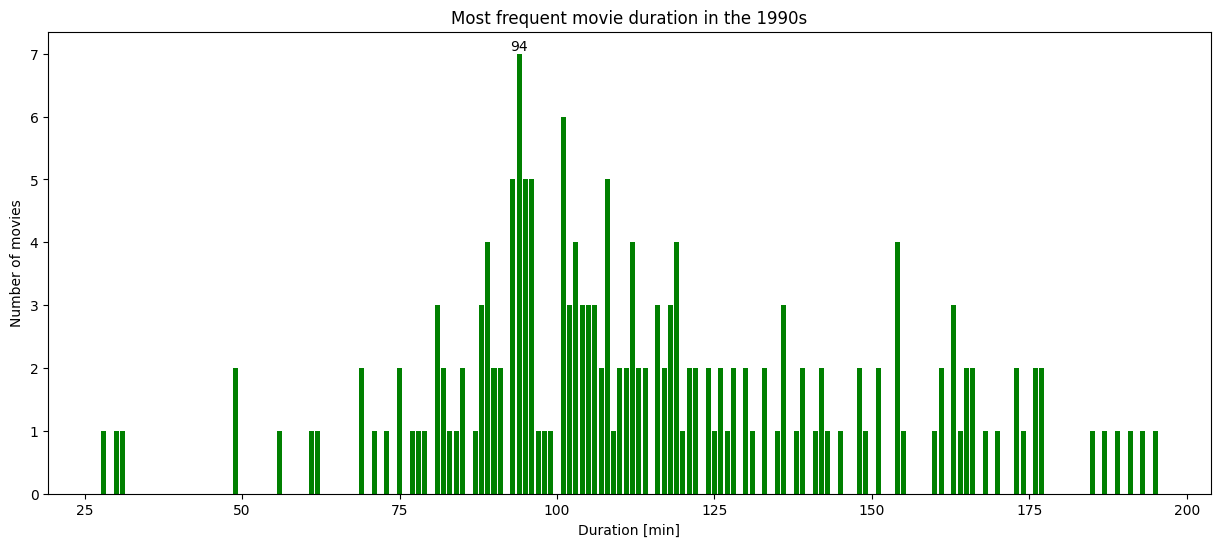

In [16]:
# Build a bar plot for the data.
plt.figure(figsize=(15, 6))
graph = plt.bar(movies_1990s_duration.index, movies_1990s_duration['show_id'], color='green')

# Add value-as-text above a bar which represents max value
maxval = 0
for bar in graph:
    yval = bar.get_height()
    if yval > maxval:
        xval = bar.get_x() + bar.get_width()/2
        maxval = yval
plt.text(xval, maxval, int(xval), ha='center', va='bottom')

# Strings
xlab = 'Duration [min]'
ylab = 'Number of movies'
title = 'Most frequent movie duration in the 1990s'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)

# display the plot after customizing
plt.show()

Next interesting question: Have shows become shorter of longer in recent years?

Text(0.5, 1.0, 'Average duration of Netflix shows released in a given year')

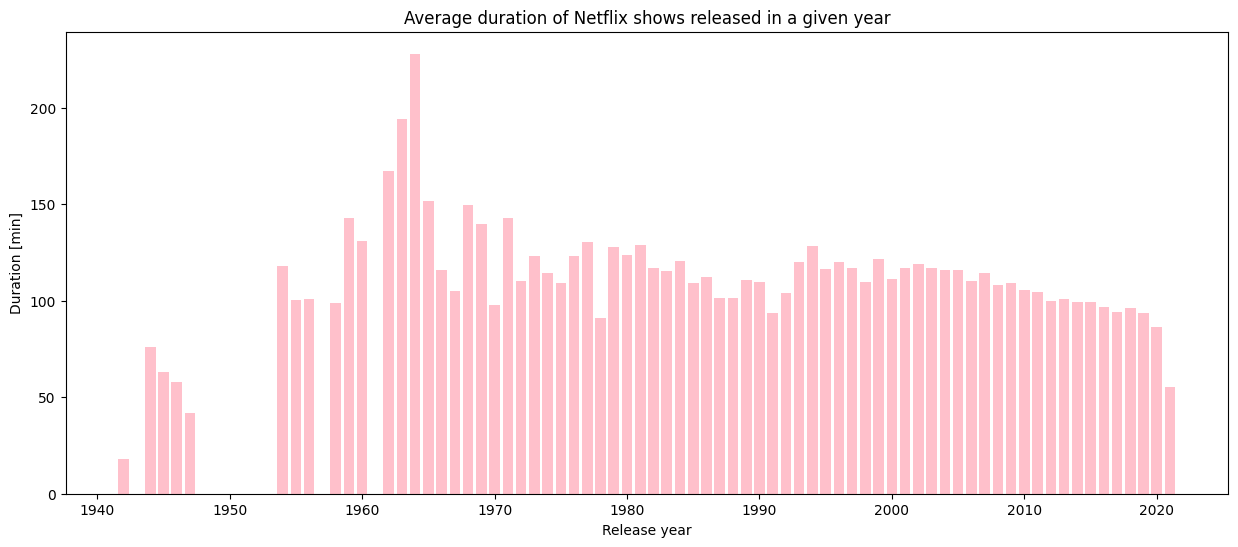

In [23]:
# Calculate the mean duration of the shows released in a given year.
mean_duration_by_year = netflix_df.groupby('release_year')['duration'].mean()

# Build a bar plot for the data.
plt.figure(figsize=(15, 6))
graph = plt.bar(mean_duration_by_year.index, mean_duration_by_year, color='pink')

# Add axis labels
plt.xlabel('Release year')
plt.ylabel('Duration [min]')
# Add title
plt.title('Average duration of Netflix shows released in a given year')

The answer? I think I can see a general trend: starting from 2001, shows have become a bit shorter each year.

Another example.
Let's assume that someone asked to count the number of short action movies released in the 1990s. (and let's assume that a movie is considered short if it is less than 90 minutes)



In [18]:
# Extract Action Movies only (drop TV shows)
action_movies = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['genre'] == 'Action')]

# Further subset data: select movies from the nineties
action_movies_1990s = action_movies[(action_movies['release_year'] >= 1990) & (action_movies['release_year'] <= 1999)]

# Declare the counter for the task
short_movie_count = 0
#count the movies which are shorter than 90min
for index, row in action_movies_1990s.iterrows():
    if row['duration'] < 90:
        short_movie_count += 1

print('Asnwer: In the given database there are ' + str(short_movie_count) + ' action movies made in the 1990s which are shorter than 90 minutes.')

Asnwer: In the given database there are 7 action movies made in the 1990s which are shorter than 90 minutes.


On with another task. I would like to know the percentage share of each genre in the total amount of shows released each year. In other words: Were there more comedies than dramas released in 2020? Was it the same 20 years ago?

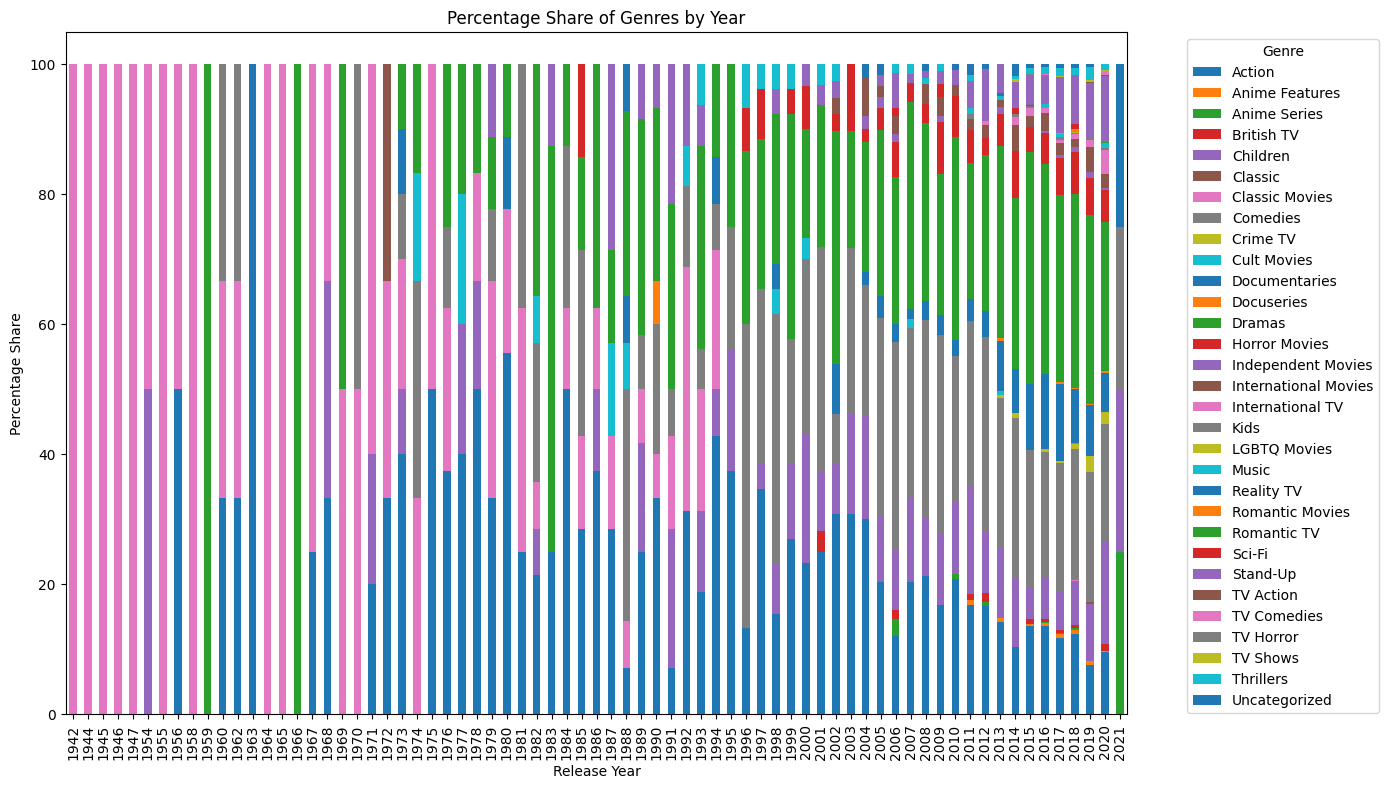

In [19]:
# Group data by release year and genre, count the number of occurrences
genre_counts_by_year = netflix_df.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Group by release year and calculate the total number of occurrences in each year
total_counts_by_year = netflix_df.groupby('release_year').size().reset_index(name='total_count')

# Merge both tables to get the total number of occurrences in each year
merged_df = pd.merge(genre_counts_by_year, total_counts_by_year, on='release_year')

# Calculate the percentage share of each genre in a given year
merged_df['percentage'] = (merged_df['count'] / merged_df['total_count']) * 100

# Pivot the data to a wide format for the bar chart
pivot_df = merged_df.pivot(index='release_year', columns='genre', values='percentage')

# Fill missing values with zeros
pivot_df = pivot_df.fillna(0)

# Create the bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

# Add title and axis labels
plt.title('Percentage Share of Genres by Year')
plt.xlabel('Release Year')
plt.ylabel('Percentage Share')

# Add legend
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the chart
plt.tight_layout()
plt.show()

Well, that is a very nice graph :-) But You can't answer the above question by looking at it. It is almost completely unreadable and not very useful. It can be seen that the classic movies dominated until 1970, but not much more really.
So let's try to modify it. I'll take 4 most frequently released genres and cut the time range to 1990-2020.


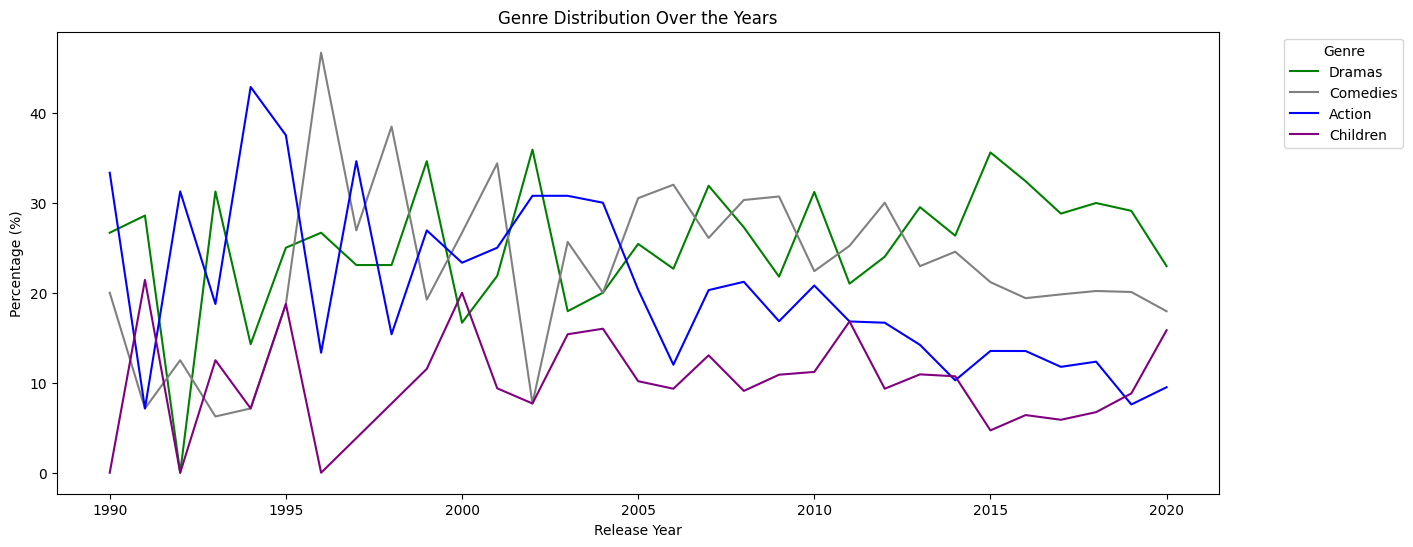

In [20]:
# Based on previos querries, we already know that 4 most frequently released genres are: Dramas, Comedies, Action and Children
popular_genres_percentage = pivot_df[['Dramas', 'Comedies', 'Action', 'Children']]

# And we are interested in analyzing the last 30 years only
recent_popular_genres_percentage = popular_genres_percentage[(popular_genres_percentage.index >= 1990) & (popular_genres_percentage.index <= 2020)]

# Let's build a graph out of that data frame
plt.figure(figsize=(15, 6))
plt.plot(recent_popular_genres_percentage.index, recent_popular_genres_percentage['Dramas'], label='Dramas', color='green')
plt.plot(recent_popular_genres_percentage.index, recent_popular_genres_percentage['Comedies'], label='Comedies', color='grey')
plt.plot(recent_popular_genres_percentage.index, recent_popular_genres_percentage['Action'], label='Action', color='blue')
plt.plot(recent_popular_genres_percentage.index, recent_popular_genres_percentage['Children'], label='Children', color='purple')

# Add Labels and title
plt.xlabel('Release Year')
plt.ylabel('Percentage (%)')
plt.title('Genre Distribution Over the Years')
# Add legend
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

That's better, but still not great. The graph is barely readable. It can be seen that action movies have become less popular recenly. Or maybe there are just more shows of different genres being released? All in all it is not the best approach.

Let's try to analyze cumulative sums instead.

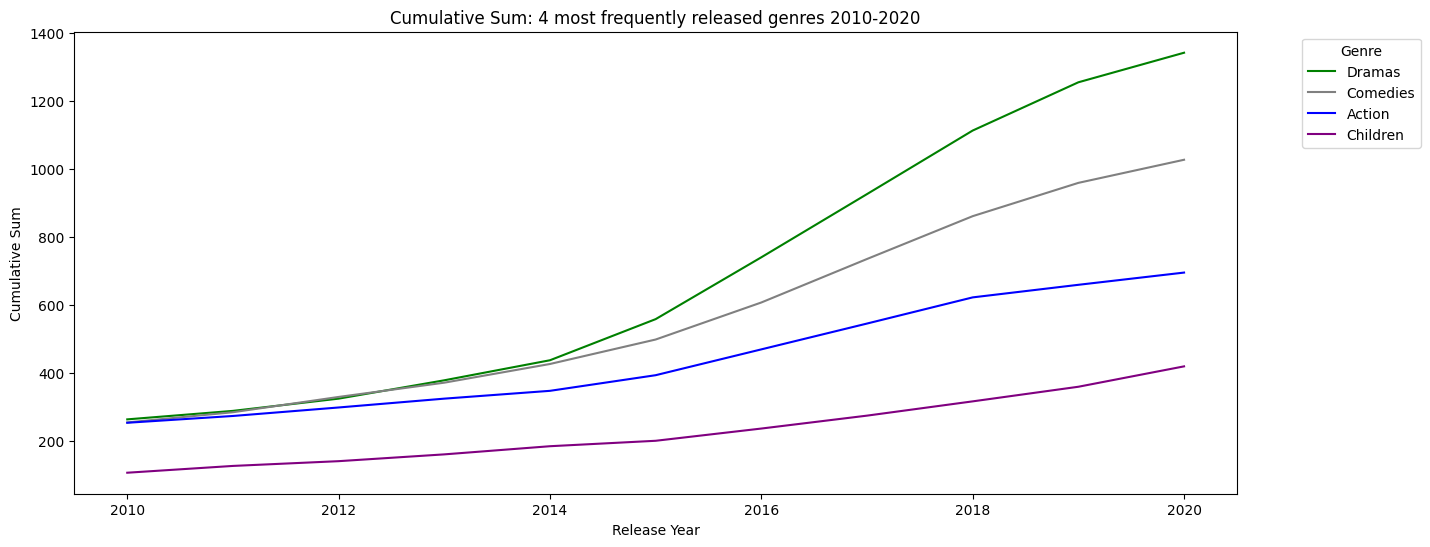

In [21]:
# I already have genre_counts_by_year calculated before
# Pivot the data to a wide format for the chart. Fill missing values with zeros
pivot_2 = genre_counts_by_year.pivot(index='release_year', columns='genre', values='count').fillna(0)
# Calculate cumulative sum of each genre
cum_genre_counts_by_year = pivot_2.cumsum()

# Take that 4 most frequently released genres
cum_popular_genres = cum_genre_counts_by_year[['Dramas', 'Comedies', 'Action', 'Children']]

# Take the last 30 years only
recent_cum_popular_genres = cum_popular_genres[(cum_popular_genres.index >= 2010) & (cum_popular_genres.index <= 2020)]

# A graph out of that data frame
plt.figure(figsize=(15, 6))
plt.plot(recent_cum_popular_genres.index, recent_cum_popular_genres['Dramas'], label='Dramas', color='green')
plt.plot(recent_cum_popular_genres.index, recent_cum_popular_genres['Comedies'], label='Comedies', color='grey')
plt.plot(recent_cum_popular_genres.index, recent_cum_popular_genres['Action'], label='Action', color='blue')
plt.plot(recent_cum_popular_genres.index, recent_cum_popular_genres['Children'], label='Children', color='purple')

# Add Labels and title
plt.xlabel('Release Year')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum: 4 most frequently released genres 2010-2020')
# Add legend
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Now that is a graph which makes sense! It's clean, readable and you can draw conclusions from it:
1. In 2010 there were almost exactly as many dramas as comedies and action movies.
2. Ten years later there was more than 1300 dramas, compared with about 1000 comedies and only about 700 action movies. Which shows that dramas are becoming more and more popular each year.
3. the number of children's shows released in 2018-2020 maintained an increasing trend, while in the case of other programs there was a decreasing trend

Let's pair this with another plot: Number of 4 most popular genres released every year:

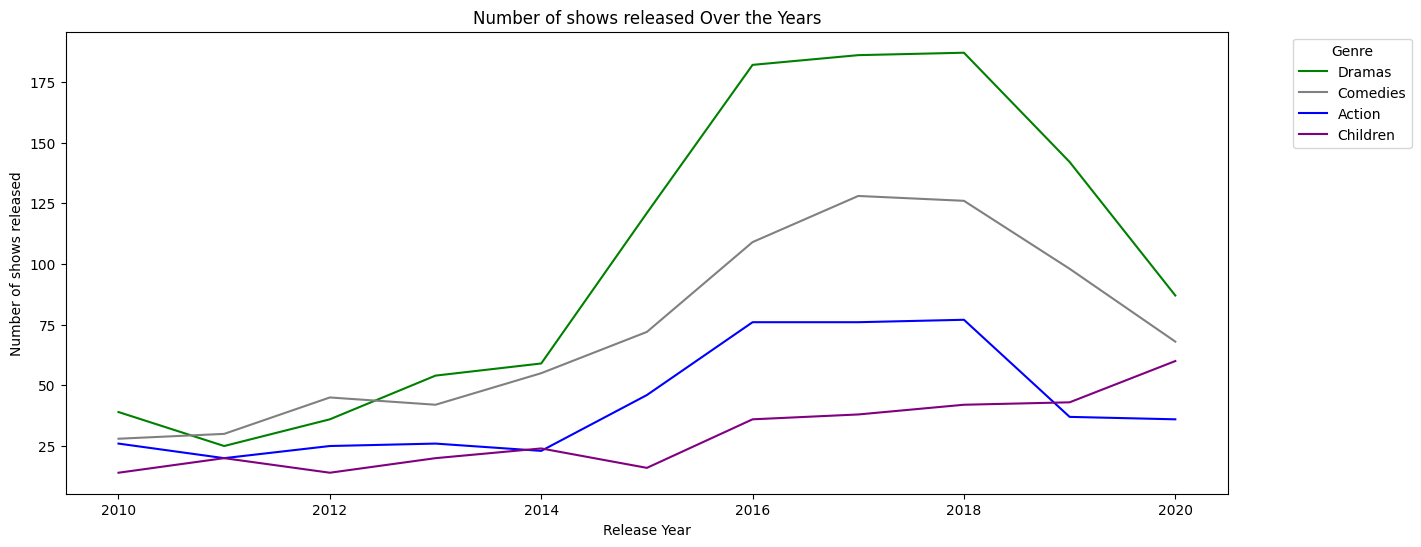

In [22]:
# Take that 4 most frequently released genres
popular_genres = pivot_2[['Dramas', 'Comedies', 'Action', 'Children']]

# Take the last 30 years only
recent_popular_genres = popular_genres[(popular_genres.index >= 2010) & (popular_genres.index <= 2020)]

# A graph out of that data frame
plt.figure(figsize=(15, 6))
plt.plot(recent_popular_genres.index, recent_popular_genres['Dramas'], label='Dramas', color='green')
plt.plot(recent_popular_genres.index, recent_popular_genres['Comedies'], label='Comedies', color='grey')
plt.plot(recent_popular_genres.index, recent_popular_genres['Action'], label='Action', color='blue')
plt.plot(recent_popular_genres.index, recent_popular_genres['Children'], label='Children', color='purple')

# Add Labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of shows released')
plt.title('Number of shows released Over the Years')
# Add legend
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

As seen above, some very interesting conclusions can be drawn from analysis of relatively simple data. What is more, some trends and predictions regarding the number of programs to be released in the future years can be calculated.


The above examples also demonstrate the versatility and ease of use of python with the pandas and matplotlib extensions for data analysis, manipulation and presentation purposes.